In [10]:
# Install library Bokeh
!pip install bokeh

# Import library yang diperlukan
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, Label
from bokeh.palettes import Viridis256
from bokeh.io import output_notebook
from bokeh.embed import file_html
from bokeh.resources import CDN
from bokeh.layouts import column
from bokeh.models.widgets import Button

In [3]:
dt_movies = pd.read_csv("https://raw.githubusercontent.com/fikri0511/Visualisasi-Data-Indonesia-Movies/main/indonesian_movies.csv")
dt_movies.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [4]:
dt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


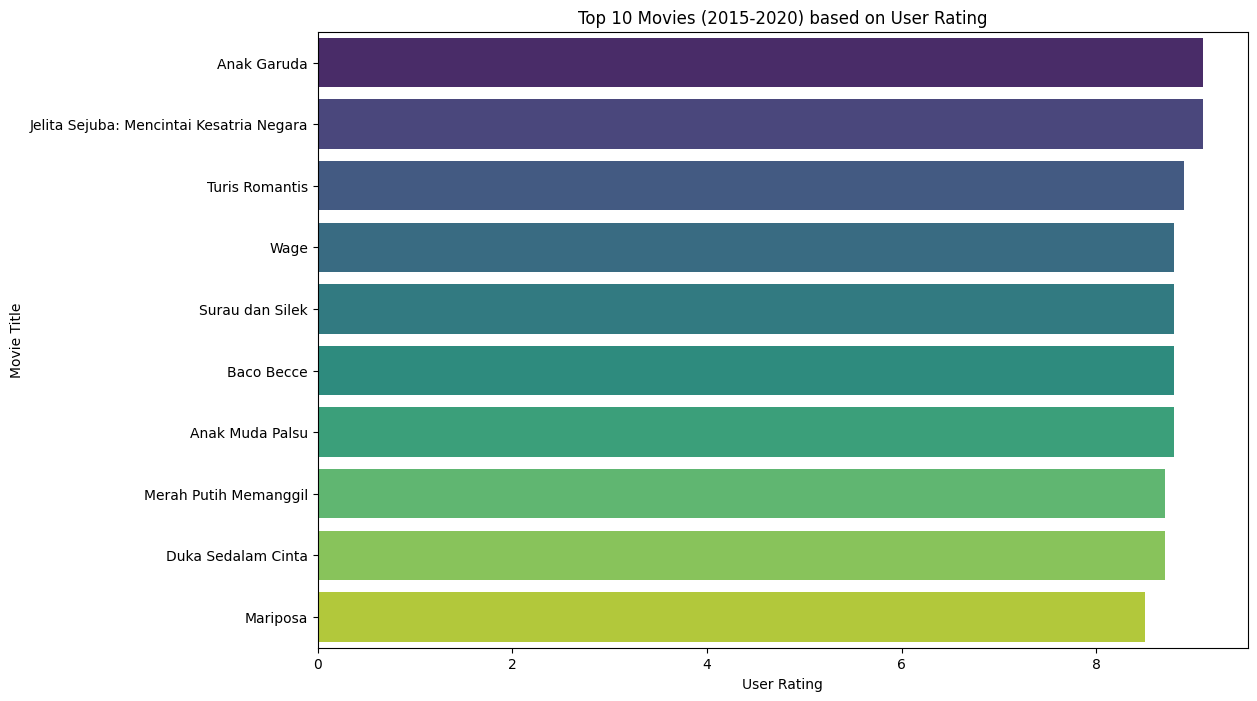

In [5]:
# Filter data untuk tahun 2015-2020
dt_movies['votes'] = pd.to_numeric(dt_movies['votes'], errors='coerce')
df_filtered = dt_movies[(dt_movies['year'] >= 2015) & (dt_movies['year'] <= 2020) & (dt_movies['votes'] > 20)]

import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan data berdasarkan user_rating secara descending
df_sorted = df_filtered.sort_values(by='users_rating', ascending=False)

# Ambil 10 film dengan user_rating tertinggi
top_10_movies = df_sorted.head(10)

# Visualisasi data
plt.figure(figsize=(12, 8))
sns.barplot(x='users_rating', y='title', data=top_10_movies, palette='viridis')
plt.title('Top 10 Movies (2015-2020) based on User Rating')
plt.xlabel('User Rating')
plt.ylabel('Movie Title')
plt.show()

In [6]:


# Urutkan data berdasarkan user_rating secara descending
df_sorted = df_filtered.sort_values(by='users_rating', ascending=False)

# Ambil 10 film dengan user_rating tertinggi
top_10_movies = df_sorted.head(10)

# Inisialisasi output_notebook untuk rendering di Colab
output_notebook()

# Buat sumber data Bokeh
source = ColumnDataSource(top_10_movies)
# Buat plot Bokeh
p = figure(y_range=top_10_movies['title'].tolist(),
           width=800,
           title='Top 10 Movies (2015-2020) based on User Rating (Votes > 20)',
           x_axis_label='User Rating', y_axis_label='Movie Title')

# Tambahkan bar plot
bars = p.hbar(y='title', right='users_rating', height=0.4, source=source,
              line_color='white', fill_color='steelblue', legend_label='User Rating')

# Tambahkan hover tool
hover = HoverTool()
hover.tooltips = [('Movie', '@title'), ('User Rating', '@users_rating')]
p.add_tools(hover)

# # Tambahkan label untuk setiap bar
# labels = Label(x=0, y=1.05, text='Number of Votes > 20', text_font_size='10pt', text_color='gray')
# p.add_layout(labels)

# Layout Bokeh
layout = column(p)

# Tampilkan plot
show(layout)


In [7]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Slider, CustomJS
from bokeh.transform import factor_cmap
from bokeh.palettes import Blues9
from bokeh.layouts import column, row
from bokeh.models.layouts import TabPanel, Tabs


# Assuming `dt_movies` is your DataFrame with the movie data

# Filter data for the years 2015-2020
filtered_df = dt_movies[dt_movies['year'].between(2015, 2020)]

# Create a list to store the panels for each year
panels = []

for year in range(2015, 2021):
    # Filter data for the current year
    current_year_df = filtered_df[filtered_df['year'] == year]

    # Calculate average user ratings for each director
    director_ratings = current_year_df.groupby('directors')['users_rating'].mean().sort_values(ascending=False).head(5)

    # Convert the directors index to a list of strings
    director_categories = director_ratings.index.astype(str).tolist()

    # Prepare data for Bokeh plot
    source = ColumnDataSource(data=dict(
        directors=director_categories,
        avg_users_rating=director_ratings.values,
        titles=current_year_df.groupby('directors')['title'].first().loc[director_ratings.index].tolist()
    ))

    # Create a Bokeh figure
    p = figure(x_range=director_categories, height=400, width=600,
               title=f"Top 5 Directors by Average User Rating ({year})", toolbar_location="above",
               tools="pan,box_zoom,reset,save")

    # Add bar glyphs
    bars = p.vbar(x='directors', top='avg_users_rating', width=0.9, source=source, line_color="white",
                  fill_color=factor_cmap('directors', palette=Blues9, factors=director_categories))

    # Configure plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.y_range.end = 10
    p.legend.orientation = "horizontal"
    p.legend.location = "top_center"

    # Add HoverTool with movie title
    hover = HoverTool(renderers=[bars], tooltips=[("Director", "@directors"),
                                                  ("Avg User Rating", "@avg_users_rating"),
                                                  ("Movie Title", "@titles")])
    p.add_tools(hover)

    # Add slider for adjusting bar width
    slider = Slider(start=0.1, end=1.0, value=0.9, step=0.1, title="Bar Width")

    # Define JavaScript callback to update bar width based on slider value
    callback = CustomJS(args=dict(bars=bars, slider=slider),
                        code="""
                        bars.glyph.width = slider.value;
                        """)
    slider.js_on_change('value', callback)

    # Create a panel for the figure and slider
    panel = TabPanel(child=row(p, slider), title=str(year))

    # Append the panel to the list
    panels.append(panel)

# Create tabs from the panels
tabs = Tabs(tabs=panels)

# Show the plot in the Jupyter Notebook
output_notebook()
show(tabs)


<ipython-input-7-306f8a60ff25>:48: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.orientation = "horizontal"
<ipython-input-7-306f8a60ff25>:49: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.location = "top_center"
<ipython-input-7-306f8a60ff25>:48: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.orientation = "horizontal"
<ipython-input-7-30

In [8]:
# Filter data for the years 2015-2020
filtered_df = dt_movies[dt_movies['year'].between(2015, 2020)]

# Calculate average user ratings for each director
director_ratings = filtered_df.groupby('directors')['users_rating'].mean().sort_values(ascending=False).head(5)

# Convert the directors index to a list of strings
director_categories = director_ratings.index.astype(str).tolist()

# Prepare data for Bokeh plot
source = ColumnDataSource(data=dict(
    directors=director_categories,
    avg_users_rating=director_ratings.values
))

# Create a Bokeh figure
p = figure(x_range=director_categories, height=400, width=600, title="Top 5 Directors by Average User Rating (2015-2020)",
           toolbar_location="above", tools="pan,box_zoom,reset,save", tooltips=[("Director", "@directors"), ("Avg User Rating", "@avg_users_rating"),])

# Add bar glyphs
p.vbar(x='directors', top='avg_users_rating', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('directors', palette=Blues9, factors=director_categories))

# Configure plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 10
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

<ipython-input-8-7e40a9c19ca7>:28: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.orientation = "horizontal"
<ipython-input-8-7e40a9c19ca7>:29: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.location = "top_center"


In [9]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20c
from bokeh.models import ColumnDataSource

# Assuming `dt_movies` is your DataFrame with the movie data

# Filter data for the years 2015-2020
filtered_df = dt_movies[dt_movies['year'].between(2015, 2020)]

# Count the number of movies for each genre
genre_counts = filtered_df['genre'].value_counts()

# Prepare data for Bokeh plot
source = ColumnDataSource(data=dict(
    genres=genre_counts.index.tolist(),
    counts=genre_counts.values
))

# Create a Bokeh figure
p = figure(x_range=genre_counts.index.tolist(), height=400, width=800,
           title="Movie Count by Genre (2015-2020)", toolbar_location=None, tools="")

# Add vertical bars
p.vbar(x='genres', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('genres', palette=Category20c[len(genre_counts)], factors=genre_counts.index.tolist()))

# Configure plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = max(genre_counts) + 10  # Adjust the y-range for better visualization
p.xaxis.major_label_orientation = 1.2  # Rotate x-axis labels for better readability

# Add HoverTool
hover = HoverTool(tooltips=[("Genre", "@genres"), ("Movie Count", "@counts")])
p.add_tools(hover)

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)